In [68]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import pandas as pd
from scipy import interpolate
import seaborn as sns

In [196]:
Monkey18=pd.read_csv(r'C:\Users\elyon\Documents\school\CMV\Placental-Transmission-main\18x273-98CMV-seronegativePrimaryInfecflow.csv')
Monkey19=pd.read_csv(r'C:\Users\elyon\Documents\school\CMV\Placental-Transmission-main\19x223-98CMV-seronegativePrimaryInfecflow.csv')
Monkey20=pd.read_csv(r'C:\Users\elyon\Documents\school\CMV\Placental-Transmission-main\20x251-05CMV-seronegativePrimaryInfecflow.csv')

In [197]:
Animal_data=pd.read_csv(r'C:\Users\elyon\Documents\school\CMV\Placental-Transmission-main\animal_data_cleared.csv')

In [198]:
monkey18=Animal_data[Animal_data.columns[[0,18]]].dropna()
monkey19=Animal_data[Animal_data.columns[[0,19]]].dropna()
monkey20=Animal_data[Animal_data.columns[[0,20]]].dropna()

In [199]:
def pchip_interpolate(monkey18,num):
    xn=np.linspace(start = min(min(monkey18[monkey18.columns[0]].values),0),
               stop = max(166, max(monkey18[monkey18.columns[0]].values)),
               num = num)
    yn = interpolate.pchip_interpolate(monkey18[monkey18.columns[0]].values, monkey18[monkey18.columns[1]].values, xn)
    return [xn,yn]

In [200]:
def days_difference(monkey18,Monkey18):
    peak18_1=monkey18.iloc[:,0].values[list(monkey18.iloc[:,1].values).index(max(monkey18.iloc[:,1].values))]
    peak18_2=Monkey18.iloc[:,0].values[list(Monkey18.iloc[:,1].values).index(max(Monkey18.iloc[:,1].values))]
    return [peak18_1,peak18_2]

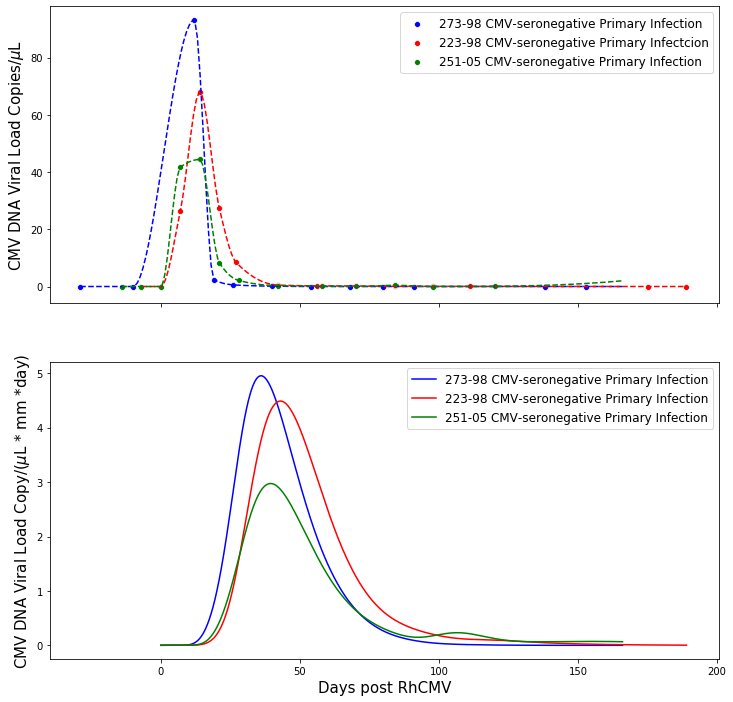

In [201]:
fig,axes=plt.subplots(2,1,sharex='col',figsize=(12,12))
sns.scatterplot(data=Animal_data, x= Animal_data.columns[0], y=Animal_data.columns[18],ax=axes[0],color='b',marker='o',label='273-98 CMV-seronegative Primary Infection')
sns.scatterplot(data=Animal_data, x= Animal_data.columns[0], y=Animal_data.columns[19],ax=axes[0],color='r',marker='o',label='223-98 CMV-seronegative Primary Infectcion')
sns.scatterplot(data=Animal_data, x= Animal_data.columns[0], y=Animal_data.columns[20],ax=axes[0],color='g',marker='o',label='251-05 CMV-seronegative Primary Infection')
[xn18,yn18]=pchip_interpolate(monkey18,200)
[xn19,yn19]=pchip_interpolate(monkey19,200)
[xn20,yn20]=pchip_interpolate(monkey20,200)
axes[0].plot(xn18,yn18,'--',color='b')
axes[0].plot(xn19,yn19,'--',color='r')
axes[0].plot(xn20,yn20,'--',color='g')
axes[0].legend(loc=1,fontsize=12)



axes[0].set_ylabel('CMV DNA Viral Load Copies/$\mu$L',fontsize=15)

sns.lineplot(data=Monkey18,x=Monkey18.columns[0],y=Monkey18.columns[1],ax=axes[1],color='b',label='273-98 CMV-seronegative Primary Infection')
sns.lineplot(data=Monkey19,x=Monkey19.columns[0],y=Monkey19.columns[1],ax=axes[1],color='r',label='223-98 CMV-seronegative Primary Infection')
sns.lineplot(data=Monkey20,x=Monkey20.columns[0],y=Monkey20.columns[1],ax=axes[1],color='g',label='251-05 CMV-seronegative Primary Infection')


axes[1].set_ylabel('CMV DNA Viral Load Copy/($\mu$L * mm *day)',fontsize=15)
axes[1].legend(loc=1,fontsize=12)
axes[1].set_xlabel('Days post RhCMV',fontsize=15)
plt.savefig('seronegative Primary Infection1.png')

In [202]:
def flow_figure(monkey18,Monkey18,num,label,color):
    fig,axes=plt.subplots(2,1,sharex='col',figsize=(12,12))
    sns.scatterplot(data=monkey18, x= monkey18.columns[0], y=monkey18.columns[1],ax=axes[0],color=color,marker='o',label=label)

    [xn18,yn18]=pchip_interpolate(monkey18,num)
    axes[0].plot(xn18,yn18,color=color)

    axes[0].legend(loc=1,fontsize=13)



    axes[0].set_ylabel('CMV DNA Viral Load Copies/$\mu$L',fontsize=15)

    sns.lineplot(data=Monkey18,x=Monkey18.columns[0],y=Monkey18.columns[1],ax=axes[1],color=color,label=label)


    axes[1].set_ylabel('CMV DNA Viral Load Copy/($\mu$L * mm *day)',fontsize=15)
    axes[1].legend(loc=1,fontsize=13)
    axes[1].set_xlabel('Days post RhCMV',fontsize=15)

    


    [peak18_1,peak18_2]=days_difference(monkey18,Monkey18)
    axes[0].axvline(x=peak18_1,color=color,linestyle='--')
    axes[1].axvline(x=peak18_2,color=color,linestyle='--')
    plt.title('Days between two peaks: '+"{:.2f}".format(peak18_2-peak18_1),fontsize=15)
    plt.savefig('label.png')


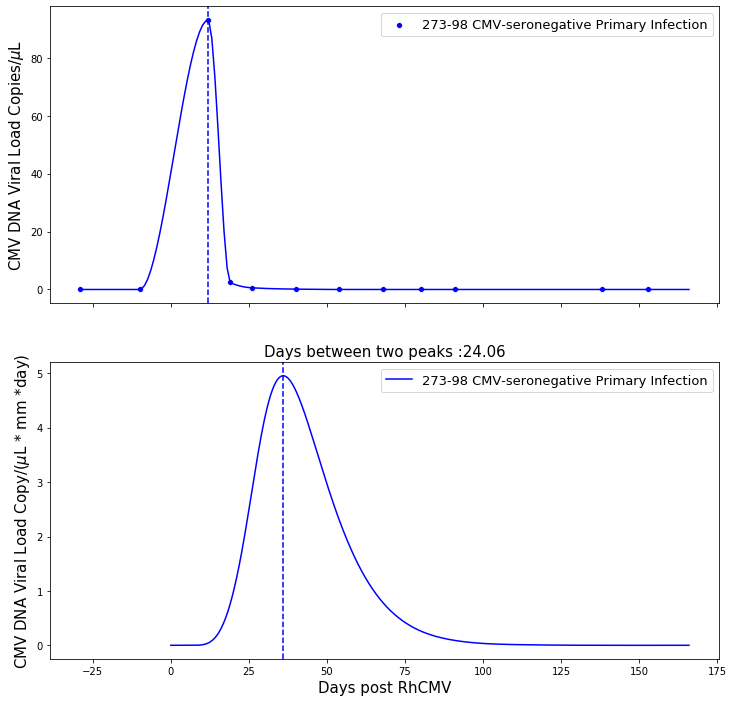

In [203]:
flow_figure(monkey18,Monkey18,200,'273-98 CMV-seronegative Primary Infection','b')

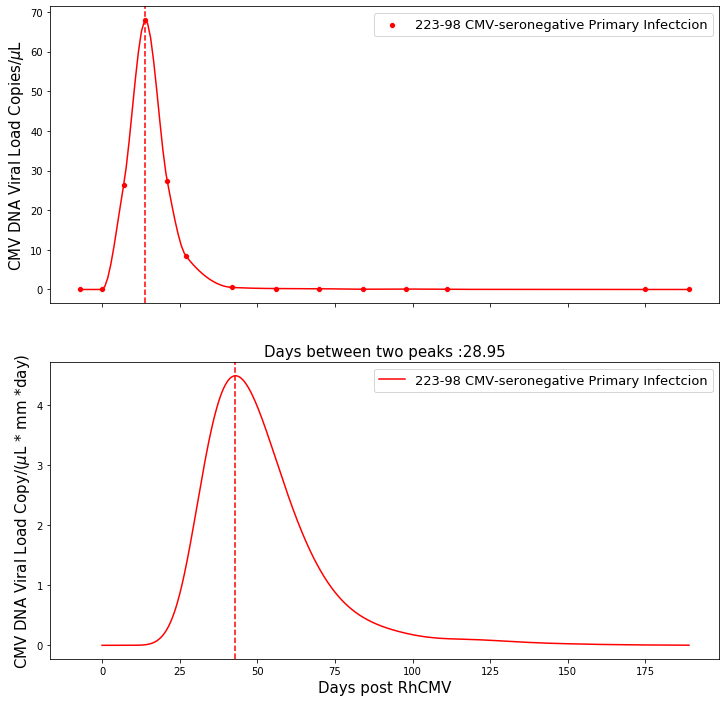

In [204]:
flow_figure(monkey19,Monkey19,200,'223-98 CMV-seronegative Primary Infectcion','r')

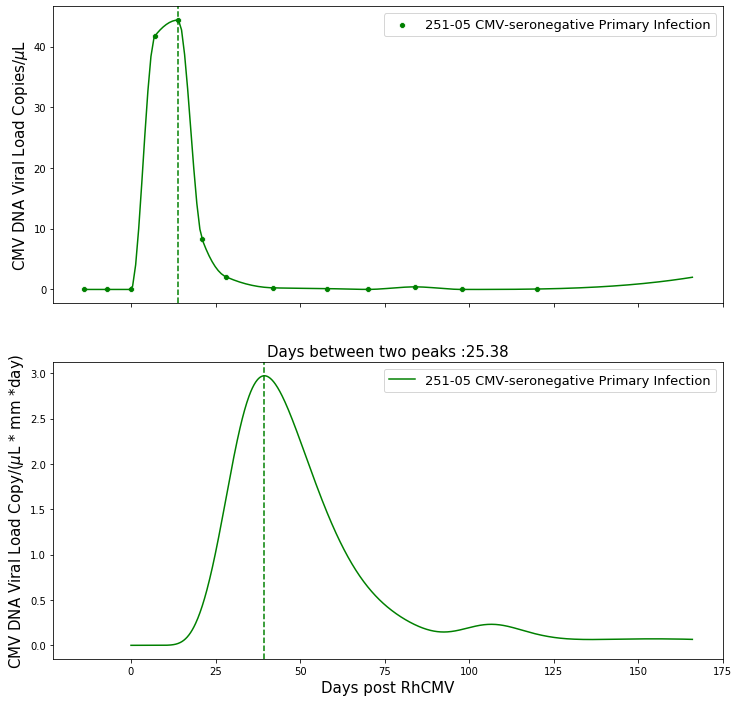

In [205]:
flow_figure(monkey20,Monkey20,200,'251-05 CMV-seronegative Primary Infection','g')